# Iman Kianian -- 4th Assignment of Machine Learning Course -- Fall 2021

In [1091]:
import warnings
warnings.filterwarnings('ignore')

#### Import Packages

In [1092]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
import scipy.io
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Part 1

In [1134]:
Data_P1 = np.array([[0,-1],[1,0],[2,1],[1,1],[-1,1],[-1,-1],[-1,-1]])
#Data_P1 = np.array([[2.5,2.4],[0.5,0.7],[2.2,2.9],[1.9,2.2],[3.1,3.0],[2.3,2.7],[2,1.6],[1,1.1],[1.5,1.6],[1.1,0.9]])

In [1135]:
print(Data_P1.shape)
Data_P1

(7, 2)


array([[ 0, -1],
       [ 1,  0],
       [ 2,  1],
       [ 1,  1],
       [-1,  1],
       [-1, -1],
       [-1, -1]])

In [1136]:
mean_P1 = np.array([np.mean(Data_P1[:,0]),np.mean(Data_P1[:,1])])
mean_P1

array([0.14285714, 0.        ])

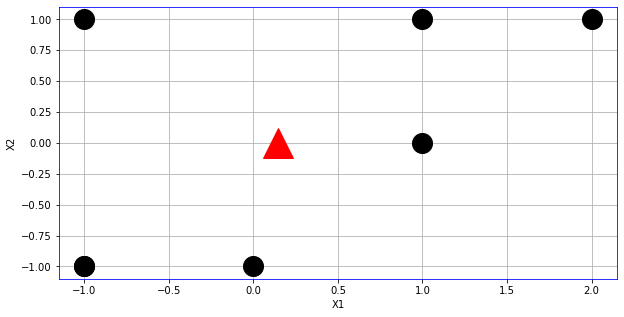

In [1137]:
fig = plt.figure(figsize=(10,5))
plt.rc('axes', facecolor='w', edgecolor='b',axisbelow=True, grid=True)
plt.xlabel("X1")
plt.ylabel("X2")
for i in range(Data_P1.shape[0]):
    plt.plot(Data_P1[i,0], Data_P1[i,1], marker="o", markersize=20, color="black")
plt.plot(mean_P1[0], mean_P1[1], marker="^", markersize=30, color="red")
plt.show()

In [1144]:
Data_Substracion_P1 = np.zeros(Data_P1.shape)  # X^~
for i in range(Data_P1.shape[0]):
    Data_Substracion_P1[i,:] = np.subtract(Data_P1[i,:],mean_P1)
Data_Substracion_P1

array([[-0.14285714, -1.        ],
       [ 0.85714286,  0.        ],
       [ 1.85714286,  1.        ],
       [ 0.85714286,  1.        ],
       [-1.14285714,  1.        ],
       [-1.14285714, -1.        ],
       [-1.14285714, -1.        ]])

#### Calculate Cov

In [1145]:
Cov_P1 = np.cov(Data_Substracion_P1.T)
Cov_P1

array([[1.47619048, 0.66666667],
       [0.66666667, 1.        ]])

In [1146]:
eigvalues, eigvectors = np.linalg.eig(Cov_P1)
eigvectors = eigvectors.T
print(eigvectors)
print(eigvalues)

[[ 0.81741556  0.57604844]
 [-0.57604844  0.81741556]]
[1.94600327 0.5301872 ]


In [1112]:
Largest_PC_P1 = eigvectors[np.argmax(eigvalues)]
Largest_PC_P1

array([0.81741556, 0.57604844])

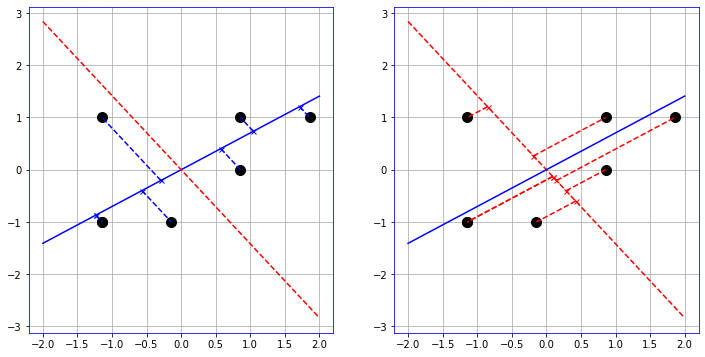

In [1113]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
plt.rc('axes', facecolor='w', edgecolor='b',axisbelow=True, grid=True)
x1 = [-2,2]
m = np.array( [Largest_PC_P1[1]/Largest_PC_P1[0]] )
x2 = [x1[0]*m , x1[1]*m]

for i in range(Data_Substracion_P1.shape[0]):
    ax1.plot(Data_Substracion_P1[i,0], Data_Substracion_P1[i,1], marker="o", markersize=10, color="black")
    ax2.plot(Data_Substracion_P1[i,0], Data_Substracion_P1[i,1], marker="o", markersize=10, color="black")
    
for i in range(Data_P1.shape[0]):
    X = (Data_Substracion_P1[i,1] + ((1/m) * Data_Substracion_P1[i,0]) - 0)/ (m+(1/m))
    ax1.plot(X, m*X, marker="x", markersize=5, color="blue")
    ax1.plot([X,Data_Substracion_P1[i,0]], (-1/m)*[X,Data_Substracion_P1[i,0]]+ Data_Substracion_P1[i,1]+(1/m)*Data_Substracion_P1[i,0], 'b--')

ind = 1- (np.argmax(eigvalues))
m = np.array( [eigvectors[ind,1]/eigvectors[ind,0]] )
x2_n = [x1[0]*m , x1[1]*m]


ax1.plot(x1, x2, 'b-')
ax1.plot(x1, x2_n, 'r--')





ax2.plot(x1, x2_n, 'r--')
ax2.plot(x1, x2, 'b')

for i in range(Data_P1.shape[0]):
    X = (Data_Substracion_P1[i,1] + ((1/m) * Data_Substracion_P1[i,0]) - 0)/ (m+(1/m))
    ax2.plot(X, m*X, marker="x", markersize=5, color="red")
    ax2.plot([X,Data_Substracion_P1[i,0]], (-1/m)*[X,Data_Substracion_P1[i,0]]+ Data_Substracion_P1[i,1]+(1/m)*Data_Substracion_P1[i,0], 'r--')


plt.show()

In [1114]:
Data_Substracion_P1.shape

(7, 2)

In [1115]:
new_X_P1 = np.dot(Data_Substracion_P1,Largest_PC_P1) 
new_X_P1

array([-0.69282209,  0.70064191,  2.09410591,  1.27669035, -0.35814078,
       -1.51023765, -1.51023765])

In [1116]:
Largest_PC_P1= Largest_PC_P1.reshape((1,2))
new_X_P1 = new_X_P1.reshape((1,Data_P1.shape[0]))


X_Rebuild_P1 = mean_P1 + np.dot(new_X_P1.T,Largest_PC_P1)
X_Rebuild_P1

array([[-0.42346641, -0.39909908],
       [ 0.71557274,  0.40360368],
       [ 1.8546119 ,  1.20630643],
       [ 1.1864437 ,  0.73543548],
       [-0.1498927 , -0.20630643],
       [-1.09163461, -0.86997004],
       [-1.09163461, -0.86997004]])

In [1117]:
Data_P1

array([[ 0, -1],
       [ 1,  0],
       [ 2,  1],
       [ 1,  1],
       [-1,  1],
       [-1, -1],
       [-1, -1]])

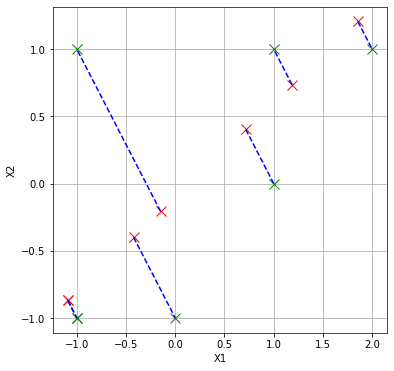

In [1118]:
fig = plt.figure(figsize=(6,6))
plt.rc('axes', facecolor='w', edgecolor='b',axisbelow=True, grid=True)
plt.xlabel("X1")
plt.ylabel("X2")
for i in range(Data_P1.shape[0]):
    plt.plot(Data_P1[i,0], Data_P1[i,1], marker="x", markersize=10, color="green")
   
    plt.plot(X_Rebuild_P1[i,0], X_Rebuild_P1[i,1], marker="x", markersize=10, color="red")

for i in range(Data_P1.shape[0]):
    plt.plot([X_Rebuild_P1[i,0],Data_P1[i,0]],[X_Rebuild_P1[i,1],Data_P1[i,1]], 'b--')

plt.show()

## Part 1 --- END 

<hr><br>

## Part 2

#### Load Data

In [1119]:
with open('train_set.npy','rb') as f:
    X_train = np.load(f)
    y_train = np.load(f)
with open('test_set.npy','rb') as f:
    X_test = np.load(f)
    y_test = np.load(f)
print(f'X_train.shape={X_train.shape} -- y_train.shape={y_train.shape}')
print(f'X_test.shape={X_test.shape} -- y_test.shape={y_test.shape}')

X_train.shape=(128, 2) -- y_train.shape=(128,)
X_test.shape=(32, 2) -- y_test.shape=(32,)


#### Standardize Data

In [1120]:
Train_mean = X_train.mean()
Train_std = X_train.std()
X_train = (X_train-Train_mean)/Train_std
X_test = (X_test-Train_mean)/Train_std

In [1122]:
y_train = y_train.reshape((y_train.shape[0],1))
y_test = y_test.reshape((y_test.shape[0],1))

#### Vizualization of training data

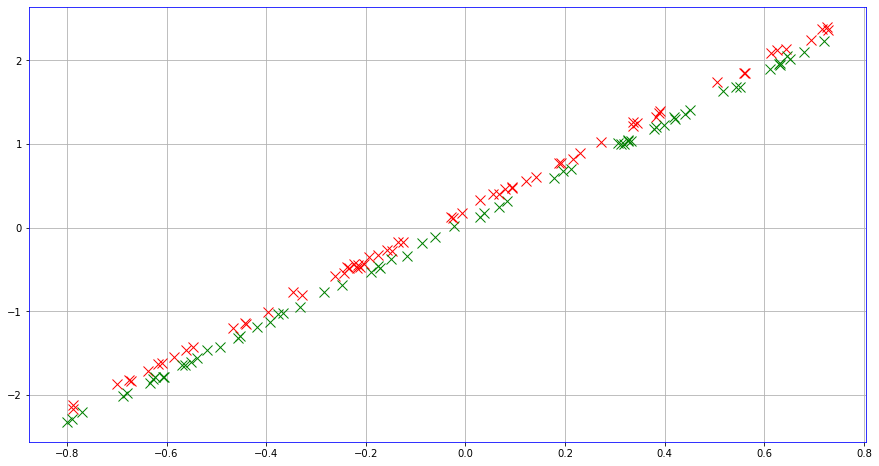

In [1123]:
fig = plt.figure(figsize=(15,8))
for i in range(y_train.shape[0]):
    if y_train[i]==0:
        plt.plot(X_train[i,0], X_train[i,1], marker="x", markersize=10, color="red")
    elif y_train[i]==1:
        plt.plot(X_train[i,0], X_train[i,1], marker="x", markersize=10, color="green")

#### Vizualization of test data

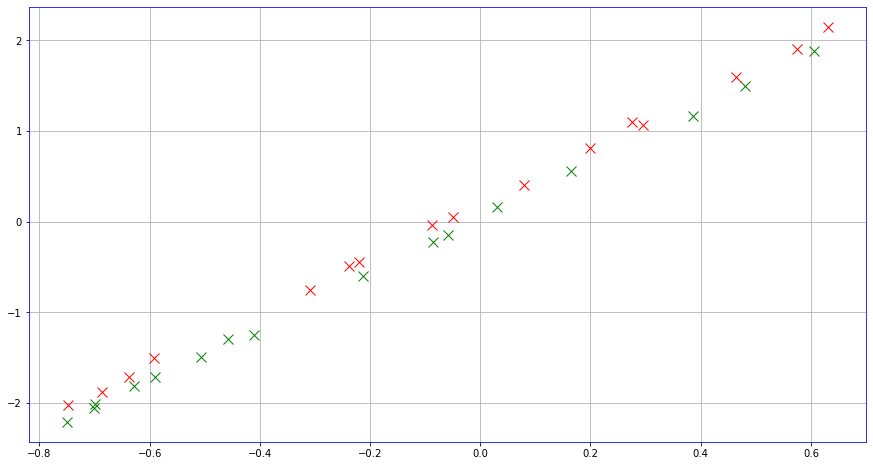

In [1124]:
fig = plt.figure(figsize=(15,8))
for i in range(y_test.shape[0]):
    if y_test[i]==0:
        plt.plot(X_test[i,0], X_test[i,1], marker="x", markersize=10, color="red")
    elif y_test[i]==1:
        plt.plot(X_test[i,0], X_test[i,1], marker="x", markersize=10, color="green")

#### Convert 2-dimensional data to 1-dimensional data with LDA

In [1125]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_train_LDA = lda.transform(X_train)
# Transform test data using Training data ...
X_test_LDA = lda.transform(X_test)

#### Convert 2-dimensional data to 1-dimensional data with LDA

In [1126]:
pca = PCA(n_components=1)
pca.fit(X_train)
X_train_PCA = pca.transform(X_train)
# Transform test data using Training data ...
X_test_PCA = pca.transform(X_test)

#### Training Perceptron Linear Classifier for Classification on the data which generated with LDA and PCA

In [1127]:
lda_perceptron_clf = Perceptron(tol=1e-10, random_state=0)
lda_perceptron_clf.fit(X_train_LDA, y_train)

pca_perceptron_clf = Perceptron(tol=1e-10, random_state=0)
pca_perceptron_clf.fit(X_train_PCA, y_train)

Perceptron(tol=1e-10)

#### Accuracy of Classification when we are using LDA for feature extraction

In [1128]:
print(
f'Accuracy on Training Data : {round(lda_perceptron_clf.score(X_train_LDA, y_train)*100)}%\n\
Accuracy on Test Data : {round(lda_perceptron_clf.score(X_train_LDA, y_train)*100)}%'
)

Accuracy on Training Data : 100%
Accuracy on Test Data : 100%


Cause Accuracy is 100% we don't need to plot.

#### Accuracy of Classification when we are using PCA for feature extraction

In [1129]:
print(
f'Accuracy on Training Data : {round(pca_perceptron_clf.score(X_train_PCA, y_train)*100)}%\n\
Accuracy on Test Data : {round(pca_perceptron_clf.score(X_test_PCA, y_test)*100)}%'
)

Accuracy on Training Data : 45%
Accuracy on Test Data : 38%


In [1130]:
pca_perceptron_clf.coef_[0][0]

0.7818182148039341

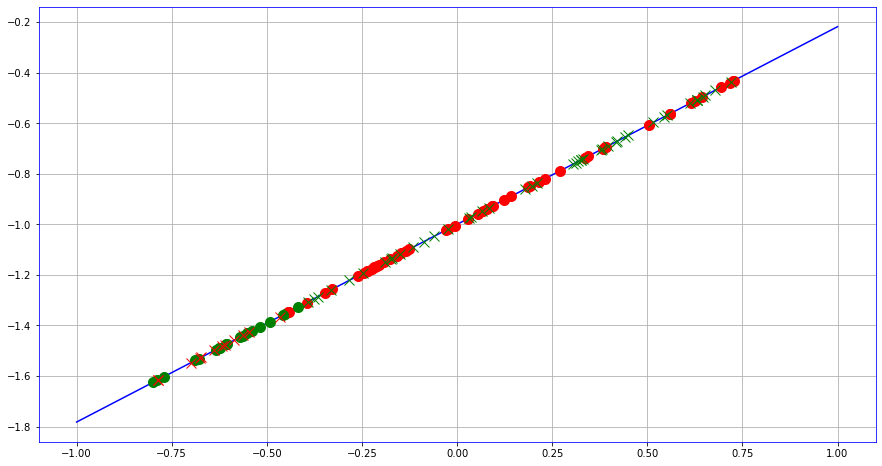

In [1131]:
fig = plt.figure(figsize=(15,8))
m = pca_perceptron_clf.coef_[0][0]
b = pca_perceptron_clf.intercept_[0]
x1 = [-1,1]
x2 = [m*x1[0]-b,m*x1[1]-b]
plt.plot(x1, x2, 'b-')
for i in range(X_train_PCA.shape[0]):
    if pca_perceptron_clf.predict(X_train_PCA[i].reshape(-1,1))== y_train[i]:
        if y_train[i]==0:
            plt.plot(X_train[i,0], m*X_train[i,0]-b, marker="x", markersize=10, color="red",zorder=5)
        elif y_train[i]==1:
            plt.plot(X_train[i,0], m*X_train[i,0]-b, marker="x", markersize=10, color="green",zorder=5)
    else:
        if y_train[i]==0:
            plt.plot(X_train[i,0], m*X_train[i,0]-b, marker="o", markersize=10, color="red",zorder=2)
        elif y_train[i]==1:
            plt.plot(X_train[i,0], m*X_train[i,0]-b, marker="o", markersize=10, color="green",zorder=2)

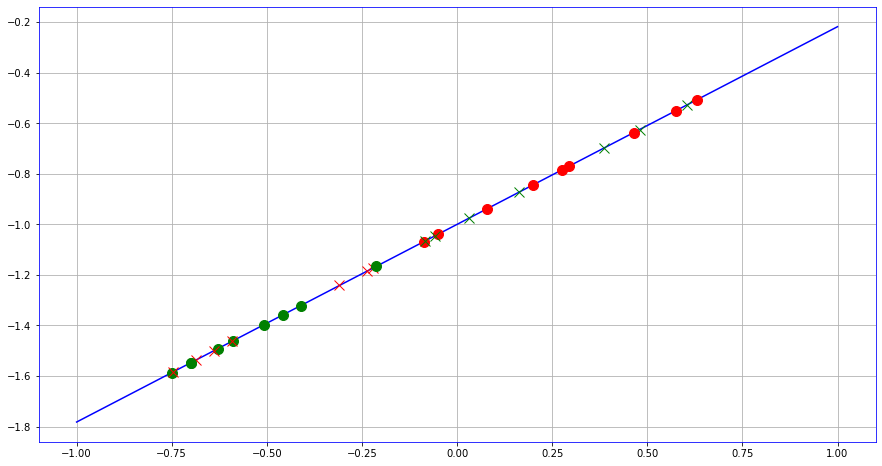

In [1132]:
fig = plt.figure(figsize=(15,8))
x1 = [-1,1]
x2 = [m*x1[0]-b,m*x1[1]-b]
plt.plot(x1, x2, 'b-')
for i in range(X_test_PCA.shape[0]):
    if lda_perceptron_clf.predict(X_test_PCA[i].reshape(-1,1))== y_test[i]:
        if y_test[i]==0:
            plt.plot(X_test[i,0], m*X_test[i,0]-b, marker="x", markersize=10, color="red")
        elif y_test[i]==1:
            plt.plot(X_test[i,0], m*X_test[i,0]-b, marker="x", markersize=10, color="green")
    else:
        if y_test[i]==0:
            plt.plot(X_test[i,0], m*X_test[i,0]-b, marker="o", markersize=10, color="red")
        elif y_test[i]==1:
            plt.plot(X_test[i,0], m*X_test[i,0]-b, marker="o", markersize=10, color="green")

## Part 2 -- END

<hr><br>

## Part 3

In [969]:
mat = scipy.io.loadmat('faces.mat')
faces = mat['faces'].T
p = mat['p'].T
u = mat['u'].T
v = mat['v'].T

Train_faces, Test_faces = train_test_split(faces, test_size=0.3,random_state=0) # Split data to train and test
print(f'faces.shape={faces.shape} -- p.shape={p.shape} -- u.shape={u.shape} -- v.shape{v.shape}')
print(f'Train_faces.shape={Train_faces.shape} -- Test_faces.shape={Test_faces.shape}')

faces.shape=(400, 4096) -- p.shape=(40, 1) -- u.shape=(40, 4096) -- v.shape(40, 4096)
Train_faces.shape=(280, 4096) -- Test_faces.shape=(120, 4096)


In [992]:
Pixel = int(math.sqrt(Train_faces.shape[1]))

### Question 1

#### select and show random images from training faces

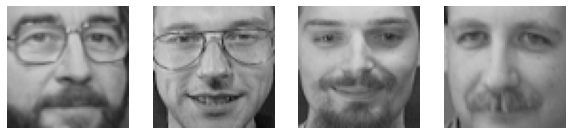

In [1058]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(10, 10))
axs = [ax1,ax2,ax3,ax4]
selected_images = []
for ax in axs:
    ax.axis('off')
    image = random.randint(0,Train_faces.shape[0])
    ax.imshow(Train_faces[image,:].reshape((Pixel,Pixel)).T, cmap='gray', vmin=0, vmax=255)
    selected_images.append(image) 

plt.show()

#### Train PCA

In [1061]:
img_PCA = PCA(n_components=45)
img_PCA.fit(Train_faces) # Train PCA with Training Faces

PCA(n_components=45)

#### Transform training and test data ...

In [1051]:
new_faces_train = img_PCA.transform(Train_faces)
new_faces_test = img_PCA.transform(Test_faces)

#### Transform to original dimension 

In [1052]:
new_faces_train = img_PCA.inverse_transform(new_faces_train)
new_faces_test = img_PCA.inverse_transform(new_faces_test)

#### Show Images after apply PCA

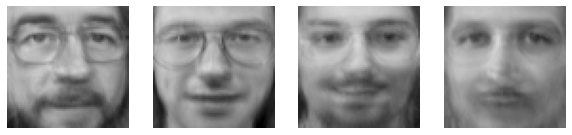

In [1063]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(10, 10))
axs = [ax1,ax2,ax3,ax4]
for ind,ax in enumerate(axs):
    ax.axis('off')
    ax.imshow(new_faces_train[selected_images[ind],:].reshape((Pixel,Pixel)).T, cmap='gray', vmin=0, vmax=255)

plt.show()

#### RMSE for Training faces

In [1054]:
RMSE_Train = mean_squared_error(Train_faces, new_faces_train,squared=False)
print(f'Root mean square error for Training faces = {RMSE_Train}')

Root mean square error for Training faces = 11.562185547599679


#### select and show random images from test faces

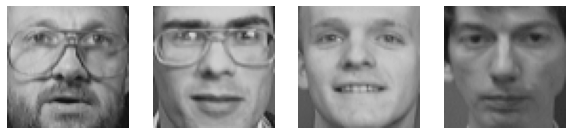

In [1064]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(10, 10))
axs = [ax1,ax2,ax3,ax4]
selected_images = []
for ax in axs:
    ax.axis('off')
    image = random.randint(0,Test_faces.shape[0])
    ax.imshow(Test_faces[image,:].reshape((Pixel,Pixel)).T, cmap='gray', vmin=0, vmax=255)
    selected_images.append(image) 

plt.show()

#### Show Images after apply PCA

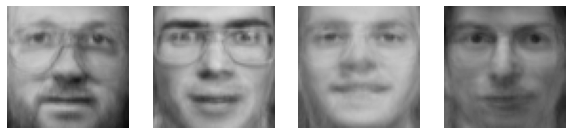

In [1065]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(10, 10))
axs = [ax1,ax2,ax3,ax4]
for ind,ax in enumerate(axs):
    ax.axis('off')
    ax.imshow(new_faces_test[selected_images[ind],:].reshape((Pixel,Pixel)).T, cmap='gray', vmin=0, vmax=255)

plt.show()

#### RMSE for Test faces

In [1066]:
RMSE_Test = mean_squared_error(Test_faces, new_faces_test,squared=False)
print(f'Root mean square error for Test faces = {RMSE_Test}')

Root mean square error for Test faces = 14.77984864667843


<hr>

### Question 2

In [1082]:
best_n = 45
tol = 0.98
count = min(Train_faces.shape[0],Train_faces.shape[1])
for i in range(45,count+1):
    img_PCA = PCA(n_components=i)
    img_PCA.fit(Train_faces) # Train PCA with Training Faces
    new_faces_train = img_PCA.transform(Train_faces)
    new_faces_train = img_PCA.inverse_transform(new_faces_train)
    if sum(img_PCA.explained_variance_ratio_)> tol :
        best_n = i
        break

In [1083]:
best_n

162

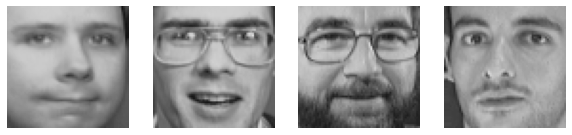

In [1148]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(10, 10))
axs = [ax1,ax2,ax3,ax4]
selected_images = []
for ax in axs:
    ax.axis('off')
    image = random.randint(0,Train_faces.shape[0])
    ax.imshow(Train_faces[image,:].reshape((Pixel,Pixel)).T, cmap='gray', vmin=0, vmax=255)
    selected_images.append(image) 

plt.show()

In [1149]:
img_PCA = PCA(n_components=best_n)
img_PCA.fit(Train_faces) # Train PCA with Training Faces


new_faces_train = img_PCA.transform(Train_faces)
new_faces_test = img_PCA.transform(Test_faces)


new_faces_train = img_PCA.inverse_transform(new_faces_train)
new_faces_test = img_PCA.inverse_transform(new_faces_test)

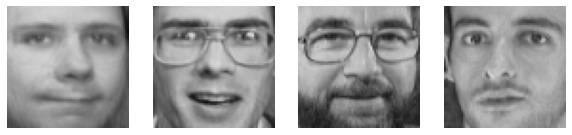

In [1150]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(10, 10))
axs = [ax1,ax2,ax3,ax4]
for ind,ax in enumerate(axs):
    ax.axis('off')
    ax.imshow(new_faces_train[selected_images[ind],:].reshape((Pixel,Pixel)).T, cmap='gray', vmin=0, vmax=255)

plt.show()

In [1087]:
RMSE_Train = mean_squared_error(Train_faces, new_faces_train,squared=False)
print(f'Root mean square error for Training faces = {RMSE_Train}')

Root mean square error for Training faces = 4.5385394478753


#### select and show random faces from test set

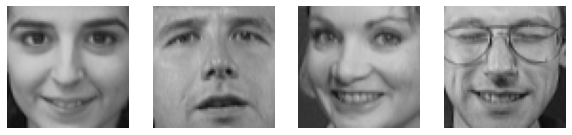

In [1088]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(10, 10))
axs = [ax1,ax2,ax3,ax4]
selected_images = []
for ax in axs:
    ax.axis('off')
    image = random.randint(0,Test_faces.shape[0])
    ax.imshow(Test_faces[image,:].reshape((Pixel,Pixel)).T, cmap='gray', vmin=0, vmax=255)
    selected_images.append(image) 

plt.show()

#### after apply PCA

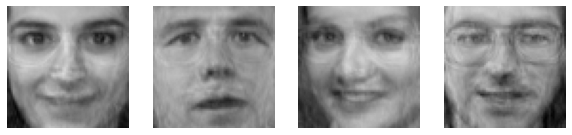

In [1089]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(10, 10))
axs = [ax1,ax2,ax3,ax4]
for ind,ax in enumerate(axs):
    ax.axis('off')
    ax.imshow(new_faces_test[selected_images[ind],:].reshape((Pixel,Pixel)).T, cmap='gray', vmin=0, vmax=255)

plt.show()

#### RMSE for test set

In [1090]:
RMSE_Test = mean_squared_error(Test_faces, new_faces_test,squared=False)
print(f'Root mean square error for Test faces = {RMSE_Test}')

Root mean square error for Test faces = 11.495316989498226


# END.